In [1]:
# import the libraries to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Step 1: Problem statement and data collection

We can see the data information in the page <https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv> where each feature is:



 1. **age**              Edad de la persona **(numeric)**
 2. **workclass**        Tipo de empleo o clase de trabajo (e.g., Private, Self-emp, Government, etc.) **(categorical)**
 3. **fnlwgt**           Peso final usado en el muestreo del censo. No suele usarse directamente en modelos de ML. **(numeric)**
 4. **education**        Nivel educativo alcanzado (e.g., Bachelors, HS-grad, Masters) **(categorical)**
 5. **education.num**    Representación numérica ordinal del nivel educativo **(categorical)**
 6. **marital.status**   Estado civil (e.g., Married, Divorced, Widowed, etc.) **(categorical)**
 7. **occupation**       Tipo de ocupación o empleo (e.g., Tech-support, Sales, Craft-repair) **(categorical)**
 8. **relationship**     Relación con la persona de referencia del hogar (e.g., Husband, Not-in-family, Own-child) **(categorical)**
 9. **race**             Raza (e.g., White, Black, Asian-Pac-Islander, etc.) **(categorical)**
 10. **sex**             Sexo biológico (Male o Female) **(categorical)**
 11. **capital.gain**    Ganancias de capital (en dólares) **(numeric)**
 12. **capital.loss**    Pérdidas de capital (en dólares) **(numeric)**
 13. **hours.per.week**  Número de horas trabajadas por semana **(numeric)**
 14. **native.country**  País de origen o nacionalidad (e.g., United-States, Mexico, India) **(categorical)**
 15. **income**          Variable objetivo: si gana más de $50,000 al año (`>50K`) o no (`<=50K`) **(categorical)** (TARGET)

In [2]:
from src.utils import load_data, ReadCsvParams, SaveCsvParams

read_csv_params: ReadCsvParams = {'delimiter': ','}
save_csv_params: SaveCsvParams = {'sep': ','}

df: pd.DataFrame = load_data(
    file_path="data/raw/adult.csv", url='', read_csv_params=read_csv_params, save_csv_params=save_csv_params
)

Loading data from file: data/raw/adult.csv


## Problem to solve:
We want to predict based on different values if a person gains more than 50k dollars

# Step 2: Exploration and data cleaning

## Dataframe information

Let's see how is the data, the info and a little of its distribution.

In [3]:
# head of the dataframe
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# tail of the dataframe
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# describe the dataframe
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Cols for the different types of data

In [7]:
# numerical columns
numerical_cols: list[str] = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

# categorical columns
categorical_cols: list[str] = ['workclass', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex',  'native.country', 'income']

# features
features = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex',  'native.country']

# target variable
target: str = 'income'

## Eliminate duplicates

We don't have something to verify if there are duplicates.

## Eliminate irrelevant information

Let's drop the education column because is the same that de education.enum

In [8]:
df = df.drop(columns=['education'])

In [9]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Step 3: Analysis of uni variate variables

A **uni variate variable** is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

## Analysis of categorical variables

A **categorical variable** is a type of variable that can be one of a limited number of categories or groups. These groups are often nominal (e.g., the color of a car: red, blue, black, etc., but none of these colors is inherently "greater" or "better" than the others) but can also be represented by finite numbers.

**To represent these types of variables we will use histograms.**

In [10]:
# let's remember the categorical data
print(f'Categorical columns: {categorical_cols}')
print(f'Amount of categorical columns: {len(categorical_cols)}')

Categorical columns: ['workclass', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
Amount of categorical columns: 9


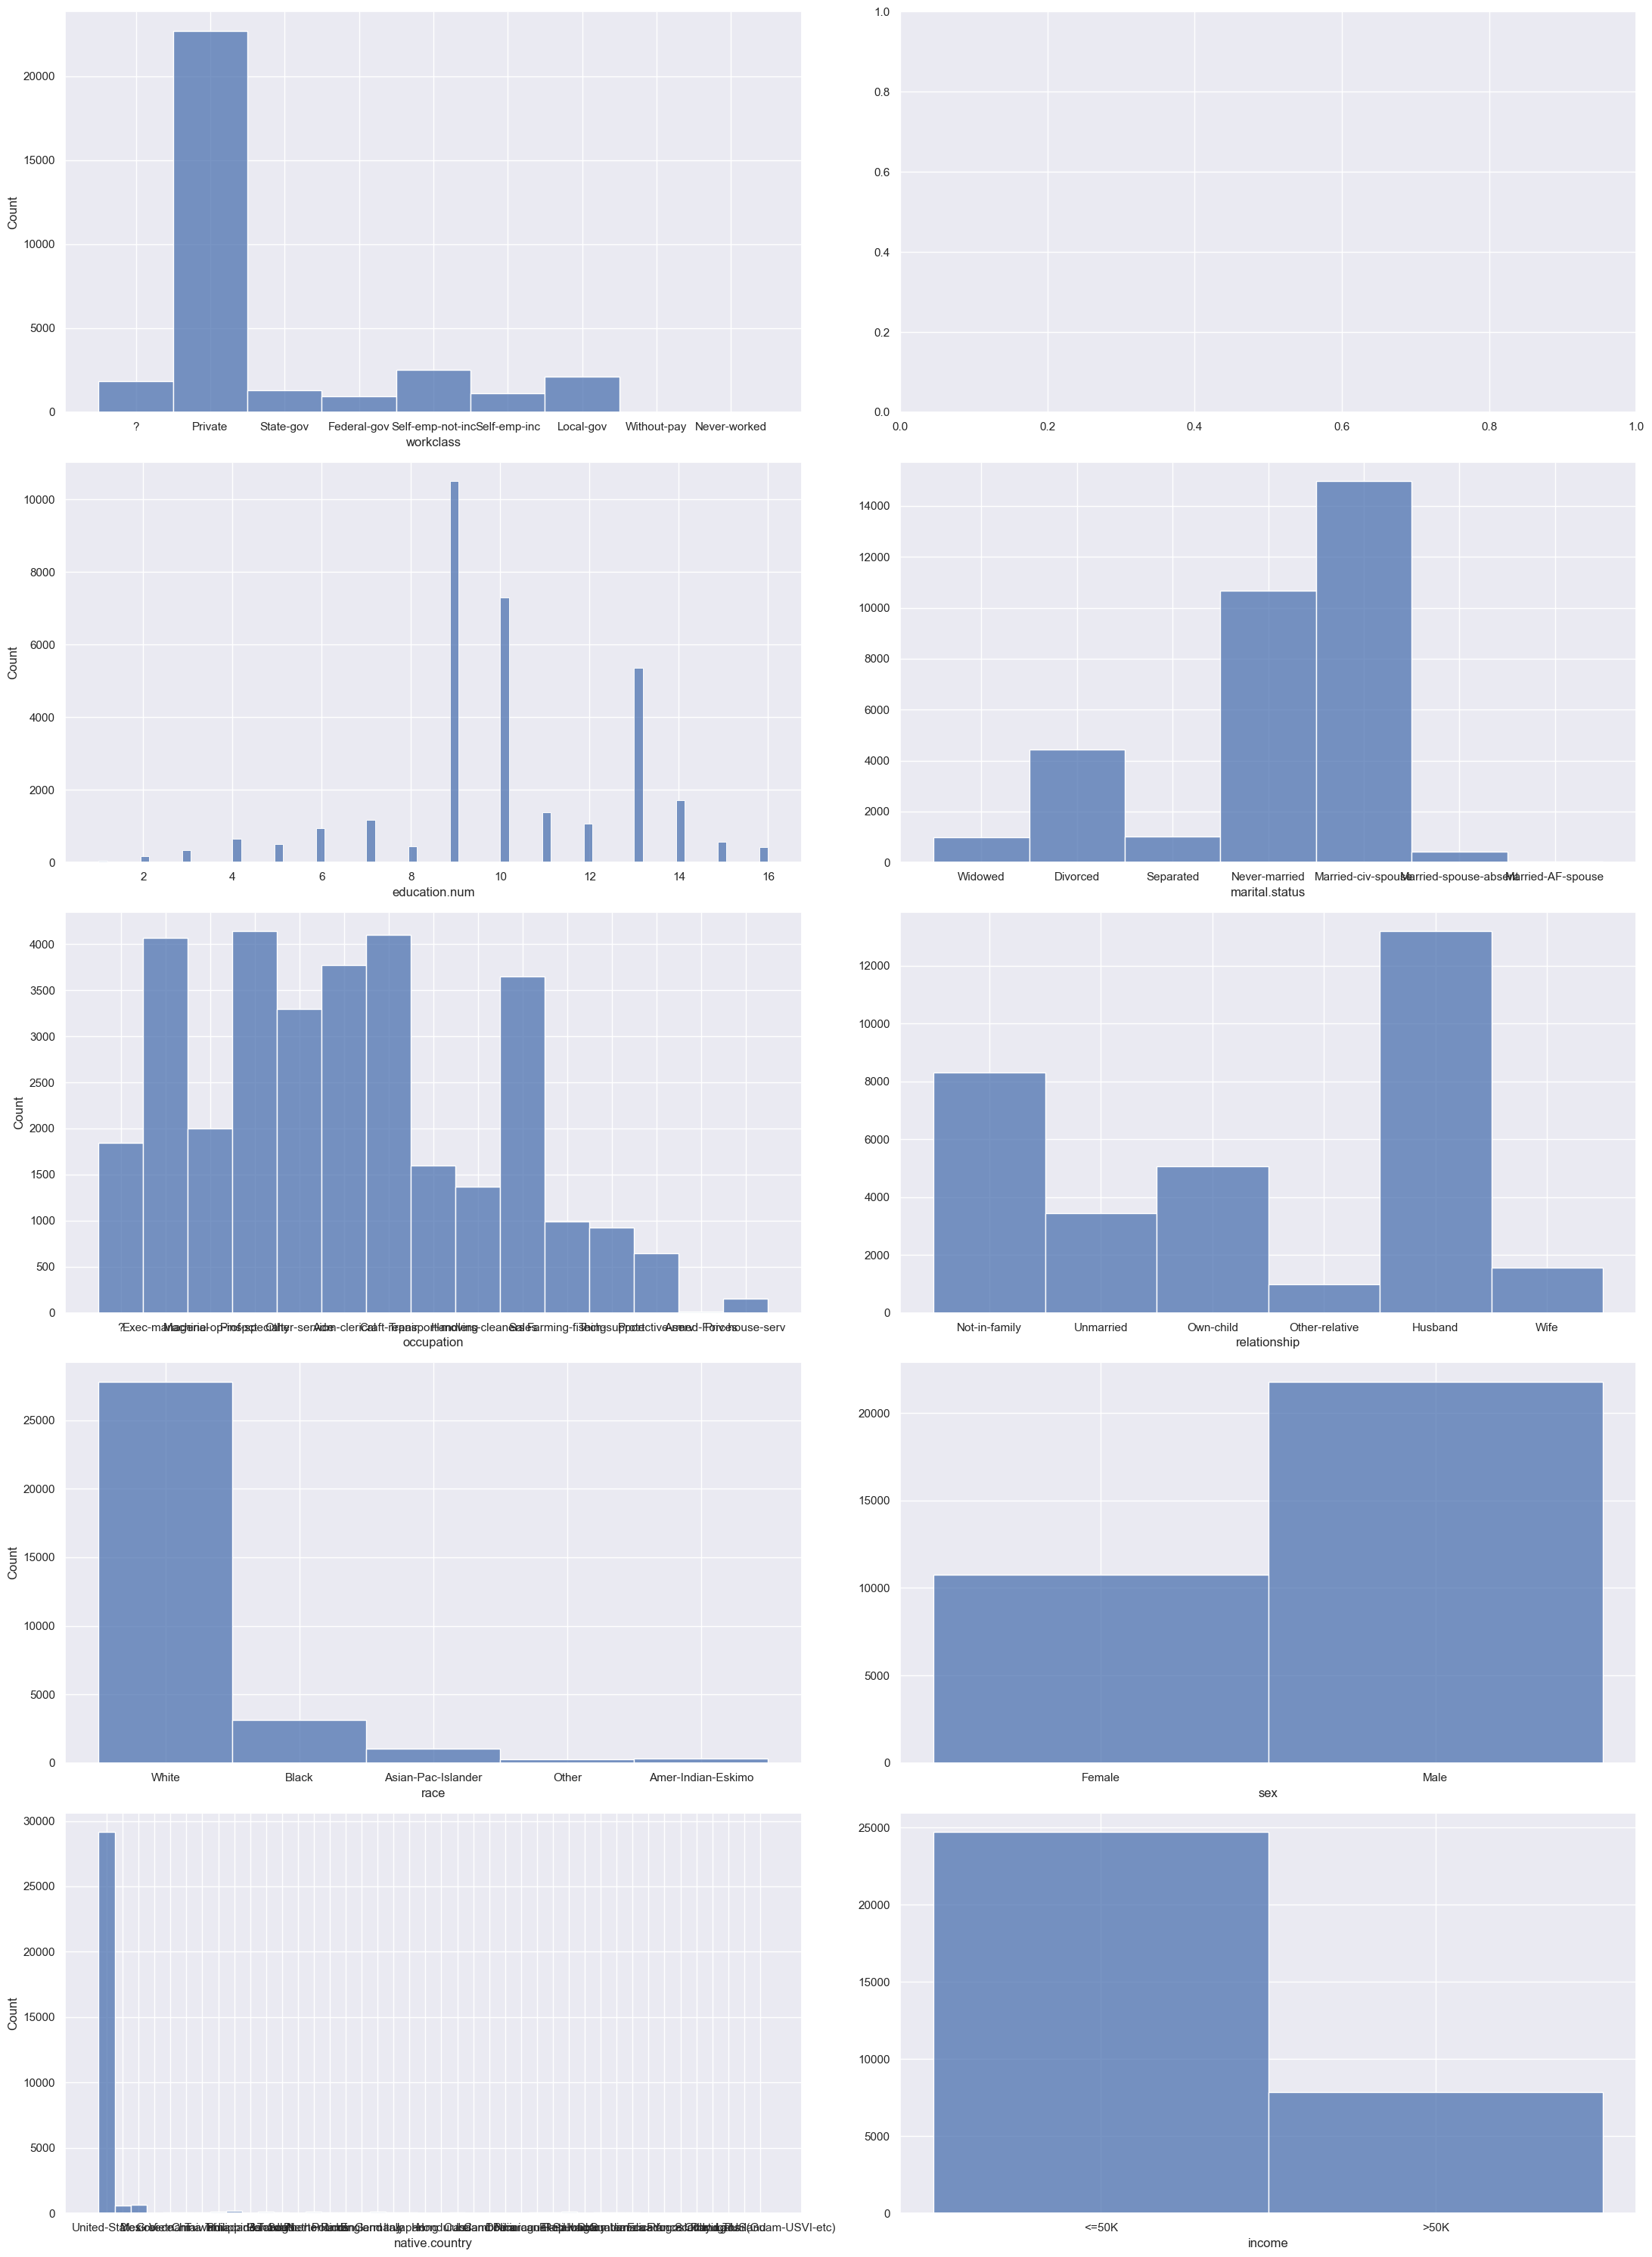

In [11]:
fig, axis = plt.subplots(5, 2, figsize=(22, 30))

"""
Create histograms for each categorical feature to see the count for each categorical feature.
"""

# creating a multiple figure with histograms and box plots
# first row
sns.histplot(ax=axis[0, 0], data=df, x="workclass")
#sns.histplot(ax=axis[0, 1], data=df, x="education").set(ylabel=None)


# second row
sns.histplot(ax=axis[1, 0], data=df, x="education.num")
sns.histplot(ax=axis[1, 1], data=df, x="marital.status").set(ylabel=None)

# third row
sns.histplot(ax=axis[2, 0], data=df, x="occupation")
sns.histplot(ax=axis[2, 1], data=df, x="relationship").set(ylabel=None)

# forth row
sns.histplot(ax=axis[3, 0], data=df, x="race")
sns.histplot(ax=axis[3, 1], data=df, x="sex").set(ylabel=None)

# fifth row
sns.histplot(ax=axis[4, 0], data=df, x="native.country")
sns.histplot(ax=axis[4, 1], data=df, x="income").set(ylabel=None)


# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

Let's graph the native.country in more detail

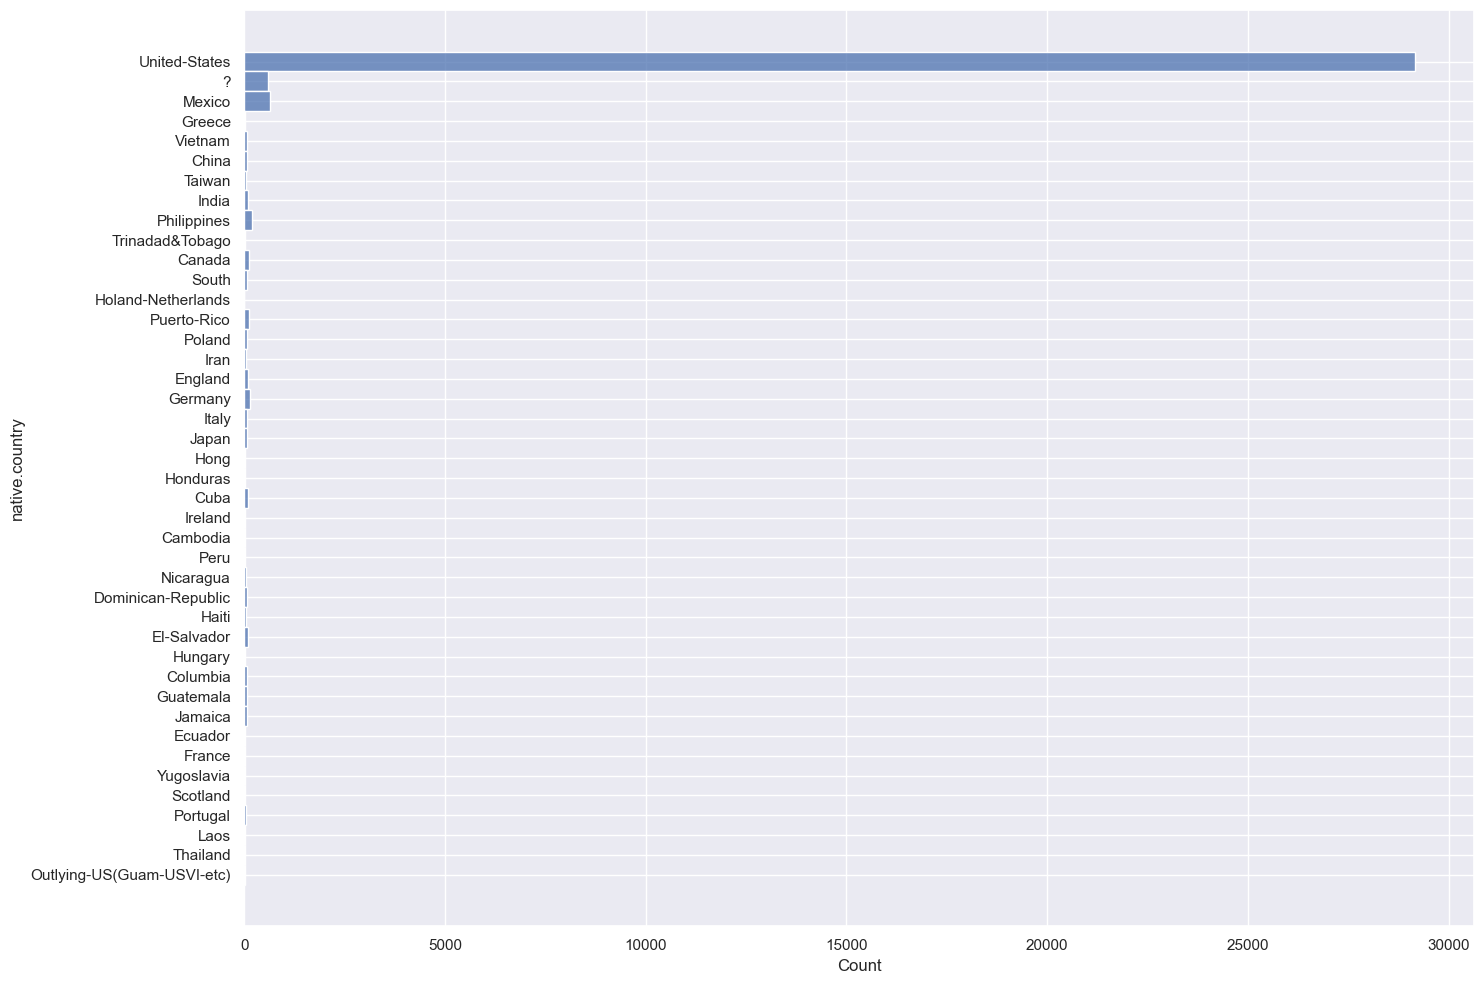

In [12]:
fig, axis = plt.subplots(figsize=(15, 10))

"""
Create histograms for each categorical feature to see the count for each categorical feature.
"""

sns.histplot(data=df, y="native.country")

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

### Analysis

Work needs to be done with the native.country because the distribution is all over the place

## Analysis on numeric variables

A **numeric variable** is a type of variable that can take numeric values (integers, fractions, decimals, negatives, etc.) in an infinite range. A numerical categorical variable can also be a numerical variable. 

**They are usually represented using a histogram and a boxplot, displayed together.**

In [13]:
# let's remember the categorical data
print(f'Categorical columns: {numerical_cols}')
print(f'Amount of categorical columns: {len(numerical_cols)}')

Categorical columns: ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
Amount of categorical columns: 5


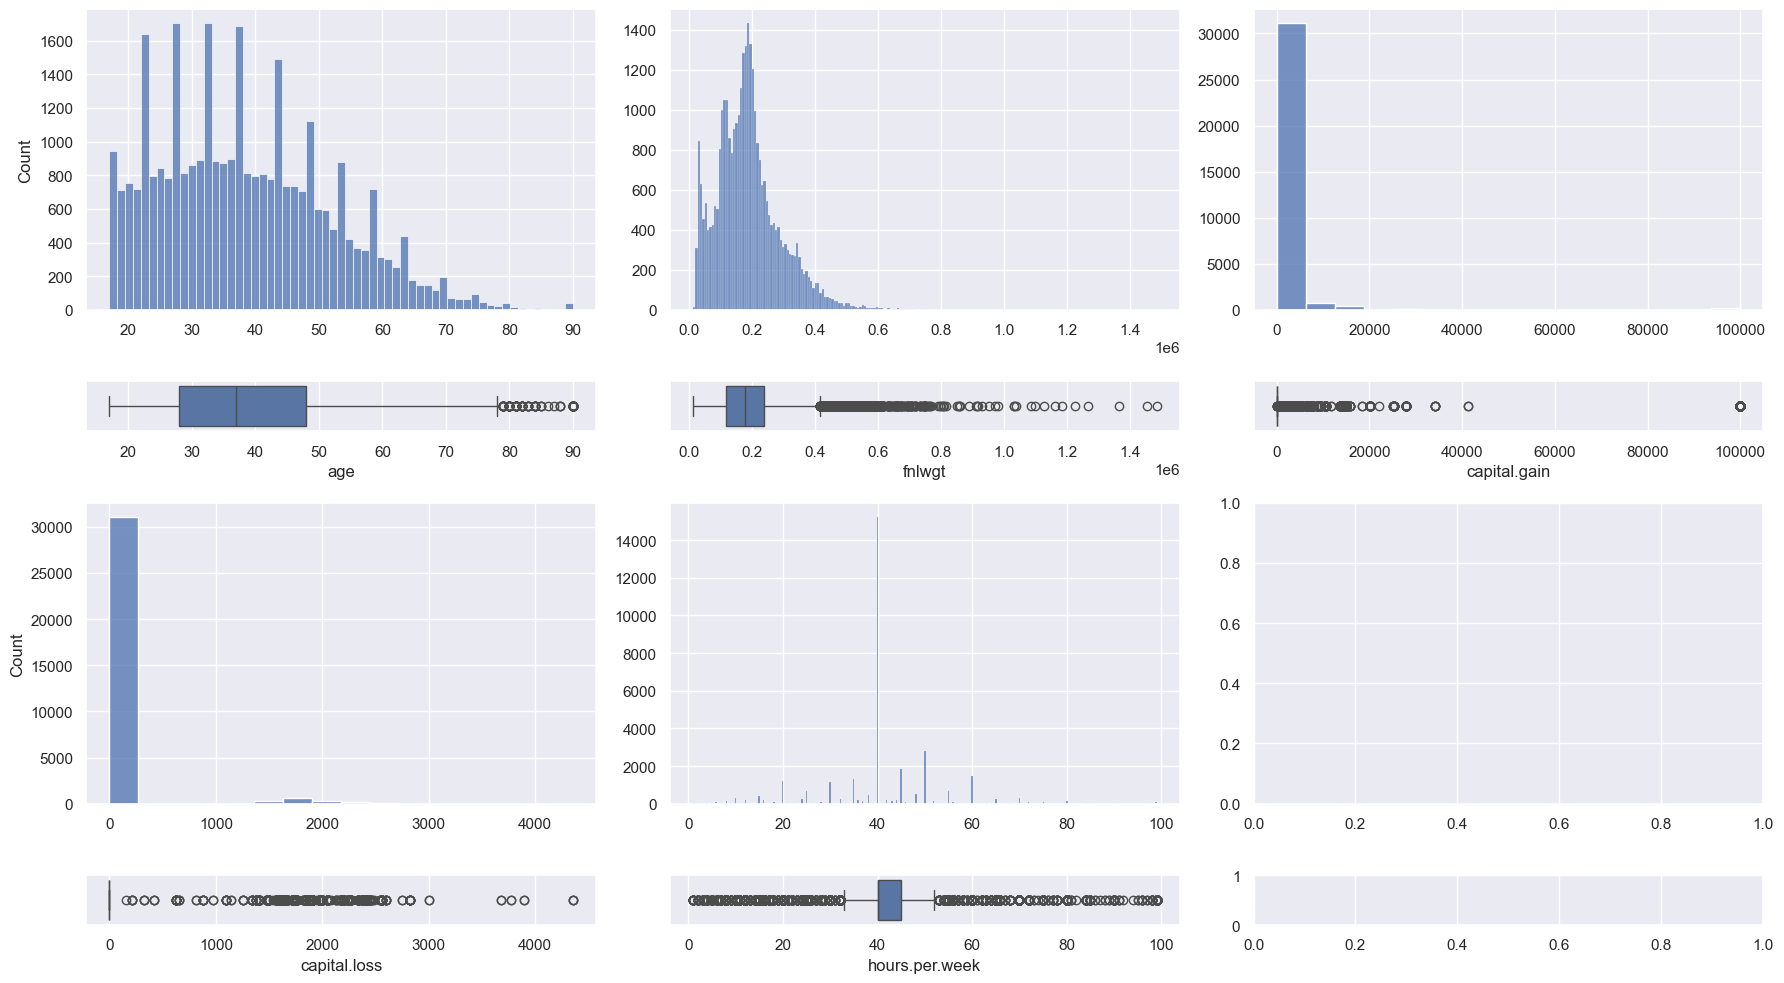

In [14]:
_, axis = plt.subplots(4, 3, figsize=(18, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

"""
Create histograms and box-plots for each numerical feature to see the count for each categorical feature.
"""

# creating a multiple figure with histograms and box plots
# first row
# 	 col
sns.histplot(ax=axis[0, 0], data=df, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="age")
# 	second col
sns.histplot(ax=axis[0, 1], data=df, x="fnlwgt").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="fnlwgt")
# 	third col
sns.histplot(ax=axis[0, 2], data=df, x="capital.gain").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x="capital.gain")

# second row
# 	 col
sns.histplot(ax=axis[2, 0], data=df, x="capital.loss").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="capital.loss")
# 	second col
sns.histplot(ax=axis[2, 1], data=df, x="hours.per.week").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="hours.per.week")

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

### Analysis

Do the breakdown of the distribution and skewness for each variable:

**1. Age**

* **Histogram:** The distribution appears to be relatively multimodal. Strongly right skew.
* **Box Plot:** The box plot shows a relatively symmetrical distribution with no apparent outliers.
* **Distribution:** Example - Not normally distributed. It looks more like a uniform distribution or possibly a multimodal distribution.
* **Skewness:** Example - Slightly right-skewed, but not strongly so.

**1. For each variable**

* **Histogram:** Example - The distribution appears to be relatively uniform or slightly multimodal. There are no strong peaks or a clear bell shape.
* **Box Plot:** Example - The box plot shows a relatively symmetrical distribution with no apparent outliers.
* **Distribution:** Example - Not normally distributed. It looks more like a uniform distribution or possibly a multimodal distribution.
* **Skewness:** Example - Slightly right-skewed, but not strongly so.

**1. For each variable**

* **Histogram:** Example - The distribution appears to be relatively uniform or slightly multimodal. There are no strong peaks or a clear bell shape.
* **Box Plot:** Example - The box plot shows a relatively symmetrical distribution with no apparent outliers.
* **Distribution:** Example - Not normally distributed. It looks more like a uniform distribution or possibly a multimodal distribution.
* **Skewness:** Example - Slightly right-skewed, but not strongly so.

**1. For each variable**

* **Histogram:** Example - The distribution appears to be relatively uniform or slightly multimodal. There are no strong peaks or a clear bell shape.
* **Box Plot:** Example - The box plot shows a relatively symmetrical distribution with no apparent outliers.
* **Distribution:** Example - Not normally distributed. It looks more like a uniform distribution or possibly a multimodal distribution.
* **Skewness:** Example - Slightly right-skewed, but not strongly so.

**1. For each variable**

* **Histogram:** Example - The distribution appears to be relatively uniform or slightly multimodal. There are no strong peaks or a clear bell shape.
* **Box Plot:** Example - The box plot shows a relatively symmetrical distribution with no apparent outliers.
* **Distribution:** Example - Not normally distributed. It looks more like a uniform distribution or possibly a multimodal distribution.
* **Skewness:** Example - Slightly right-skewed, but not strongly so.


# Step 4: Analysis of multivariate variables

After analyzing the characteristics one by one, it is time to analyze them in relation to the predictor and to themselves, in order to draw clearer conclusions about their relationships and to be able to make decisions about their processing.

Thus, if we would like to eliminate a variable due to a high amount of null values or certain outliers, it is necessary to first apply this process to ensure that the elimination of certain values are not critical for the survival of a passenger. For example, the variable Cabin has many null values, and we would have to ensure that there is no relationship between it and survival before eliminating it, since it could be very significant and important for the model and its presence could bias the prediction.

## Numerical-numerical analysis

When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. 

**Scatter-plots and correlation analysis are used to compare two numerical columns.**

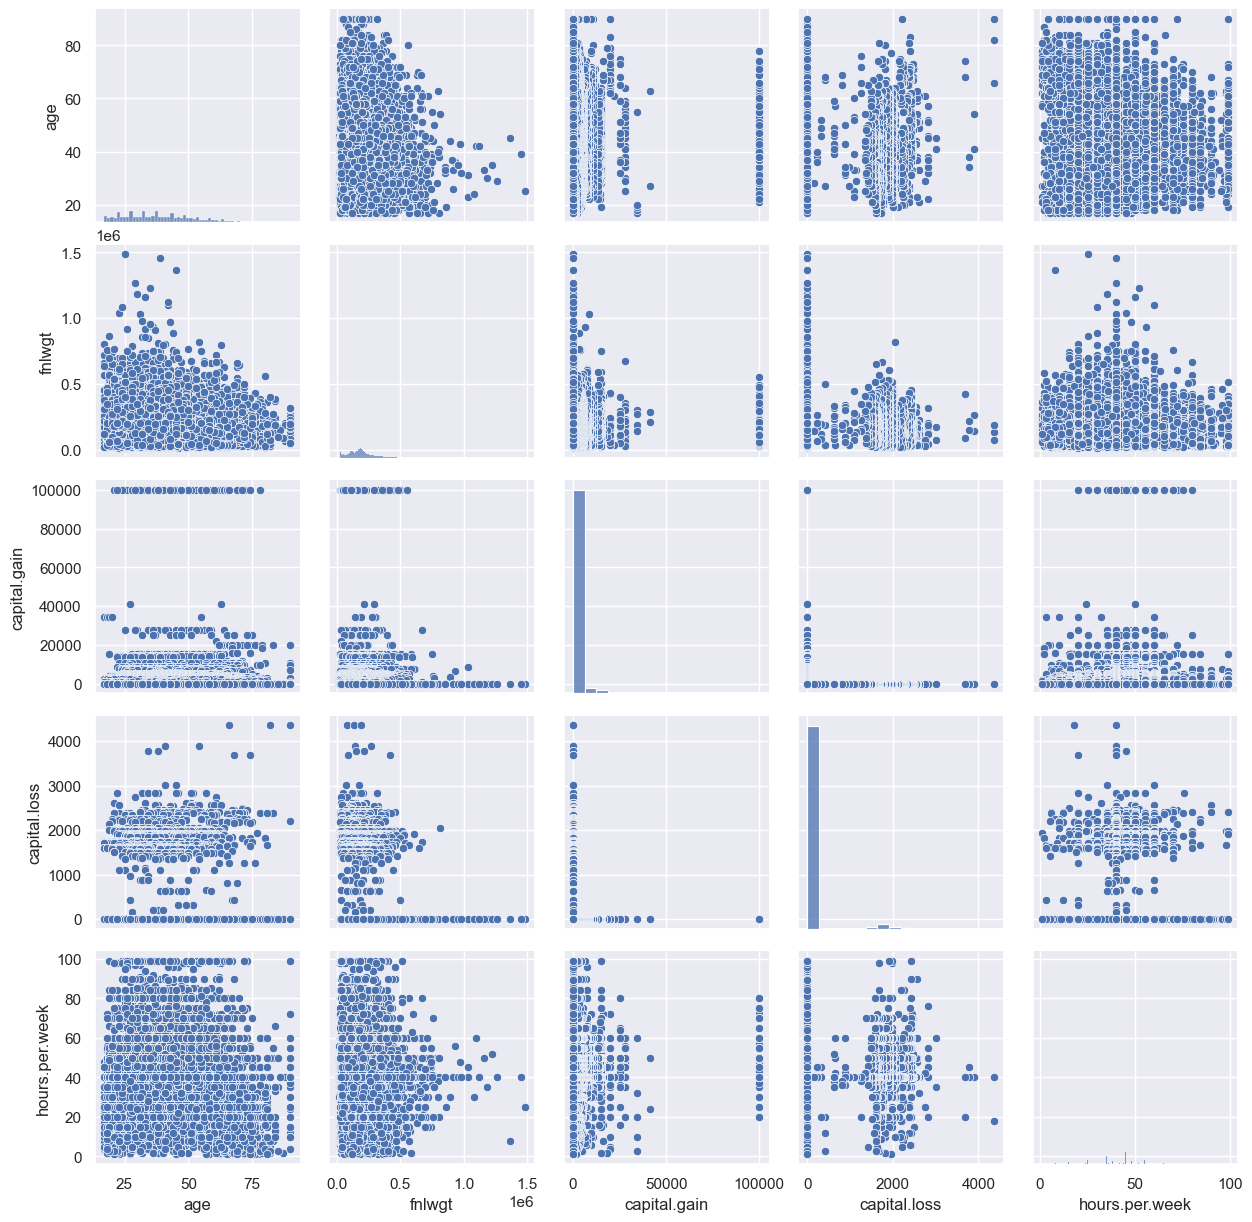

In [15]:
# graphs of numerical vs numerical with histograms and scatter plots
g = sns.PairGrid(df[numerical_cols])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

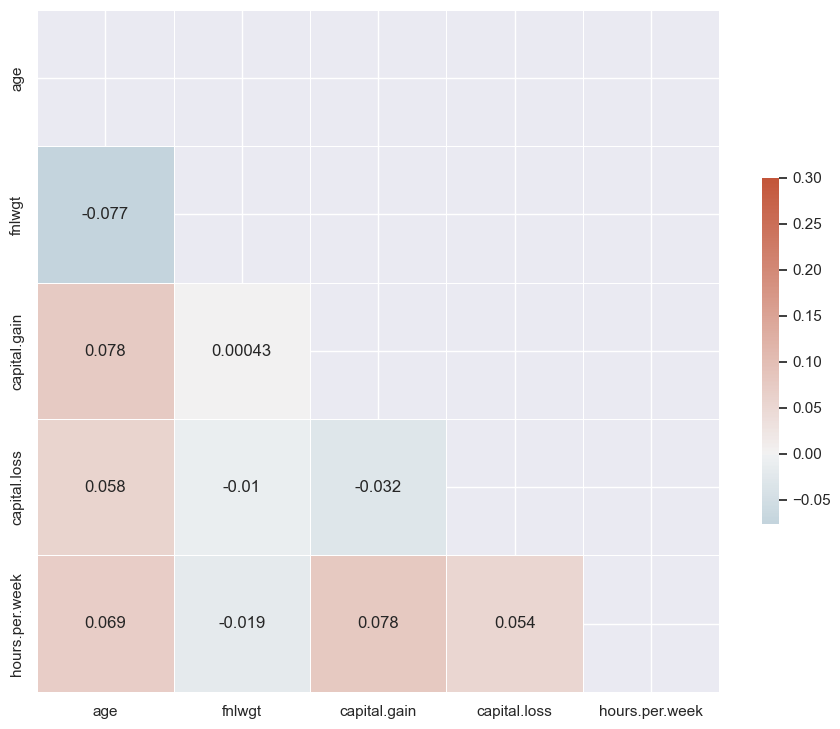

In [16]:
from src.draw_utils import draw_corr_matrix

# compute the correlation matrix of the numerical columns
corr = df[numerical_cols].corr()

# draw the correlation matrix
draw_corr_matrix(corr=corr)

### Analysis

We cant see any strong correlation between any numerical variables.

## Categorical-categorical analysis

When the two variables being compared have categorical data, the analysis is said to be categorical-categorical. 

**Histograms and combinations are used to compare two categorical columns.**

### Factorize the dataframe

In [17]:
# get a copy of the dataframe with factorize categorical data
fact_df = df.copy()

# factorize every categorical column including the target
for col in categorical_cols:
    fact_df[col] = pd.factorize(fact_df[col])[0]

In [18]:
# see the factorized dataframe
fact_df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,0,0,0,0,0,0,0,4356,40,0,0
1,82,1,132870,0,0,1,0,0,0,0,4356,18,0,0
2,66,0,186061,1,0,0,1,1,0,0,4356,40,0,0
3,54,1,140359,2,1,2,1,0,0,0,3900,40,0,0
4,41,1,264663,1,2,3,2,0,0,0,3900,40,0,0


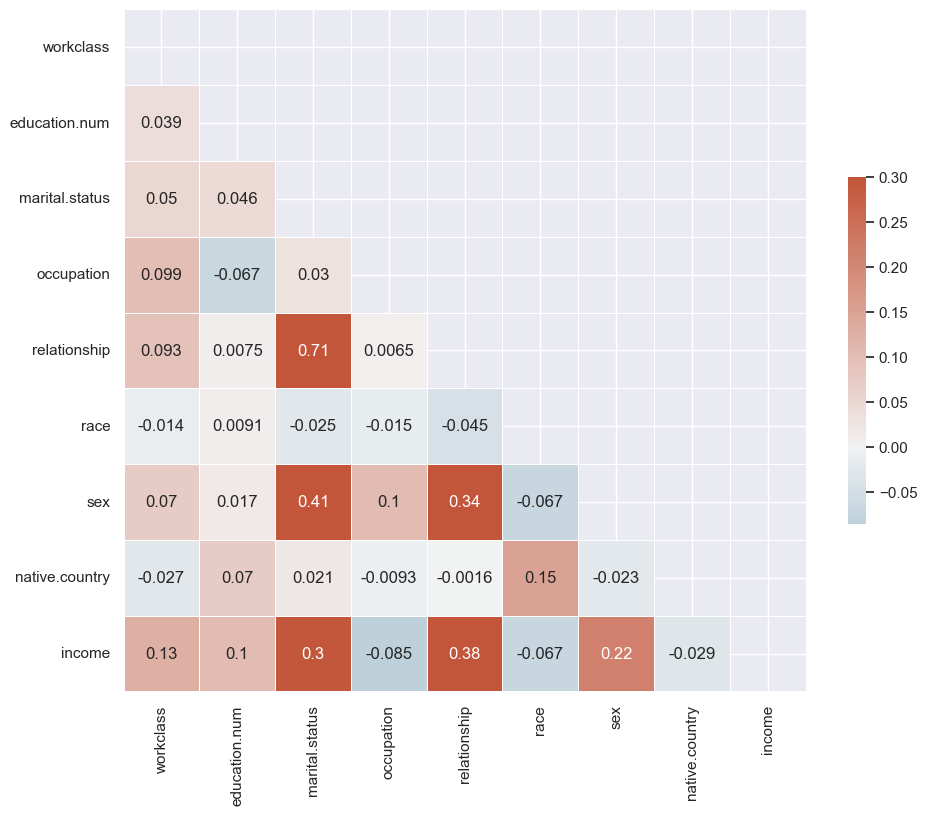

In [19]:
# compute the correlation matrix of the numerical columns
corr = fact_df[categorical_cols].corr()

# draw the correlation matrix
draw_corr_matrix(corr=corr)

We can see strong postive correlation between:
- relationship and martial.status
- sex and martial.status
- income and martial.status
- sex and relationship
- sex and income

### Combinations of class with various predictors

In [20]:
# let's remember the numerical data
print(f'Numerical columns: {numerical_cols}')
print(f'Amount of numerical columns: {len(numerical_cols)}')

Numerical columns: ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
Amount of numerical columns: 5


In [21]:
# let's remember the categorical data
print(f'Categorical columns: {categorical_cols}')
print(f'Amount of categorical columns: {len(categorical_cols)}')

Categorical columns: ['workclass', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
Amount of categorical columns: 9


Let's verify what labels was put to the types of incomes

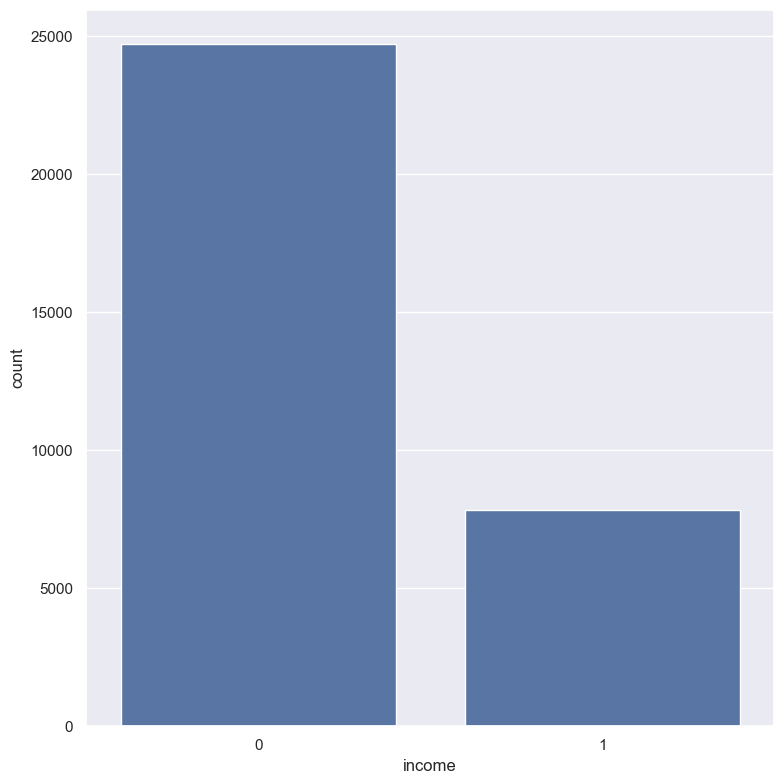

In [25]:
fig, axis = plt.subplots(figsize=(8, 8))

"""
Create histograms for each categorical feature to see the count for each categorical feature.
"""

sns.countplot(data=fact_df, x="income")

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

the 0 label to the ones that gain less than 50k and 1 for the ones that gan more than 50k

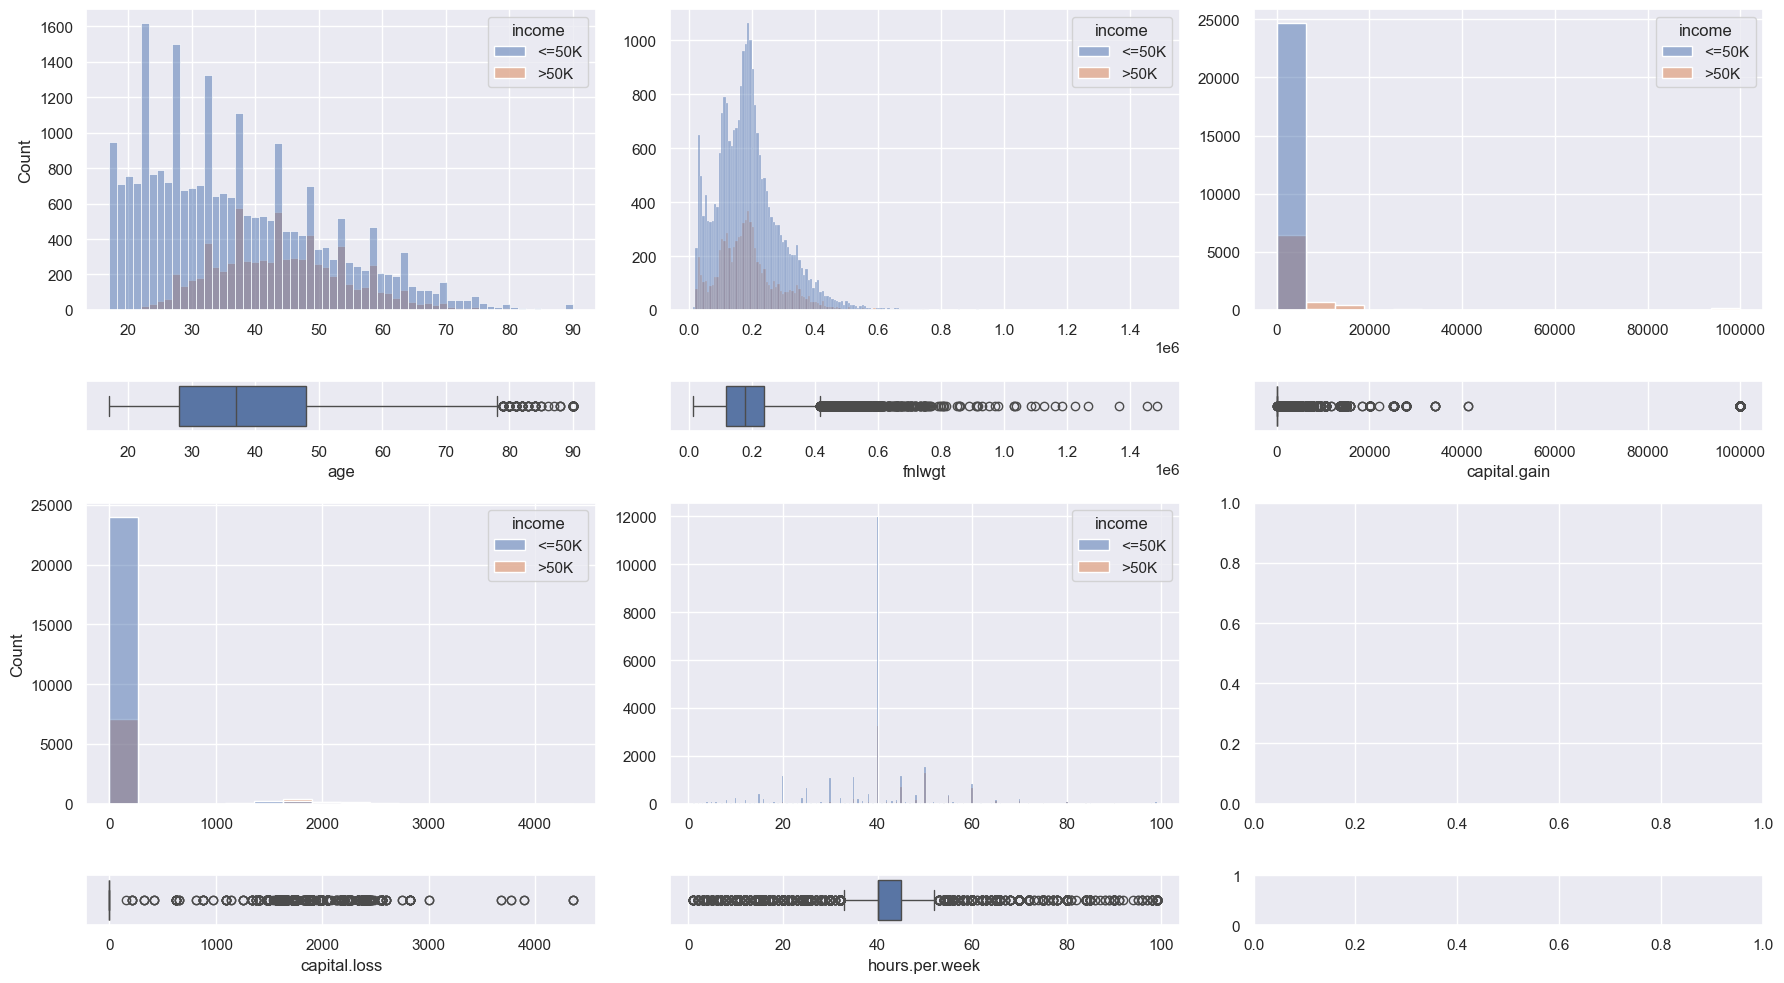

In [26]:
_, axis = plt.subplots(4, 3, figsize=(18, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

"""
Create histograms and box-plots for each numerical feature to see the count for each categorical feature.
"""

# creating a multiple figure with histograms and box plots
# first row
# 	 col
sns.histplot(ax=axis[0, 0], data=df, x="age", hue='income').set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="age")
# 	second col
sns.histplot(ax=axis[0, 1], data=df, x="fnlwgt", hue='income').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="fnlwgt")
# 	third col
sns.histplot(ax=axis[0, 2], data=df, x="capital.gain", hue='income').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=df, x="capital.gain")

# second row
# 	 col
sns.histplot(ax=axis[2, 0], data=df, x="capital.loss", hue='income').set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="capital.loss")
# 	second col
sns.histplot(ax=axis[2, 1], data=df, x="hours.per.week", hue='income').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="hours.per.week")

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

### Analysis

Here the analysis.

## Numerical-categorical analysis (complete)

Now do the analysis of the numerical vs categorical variables (factorized).

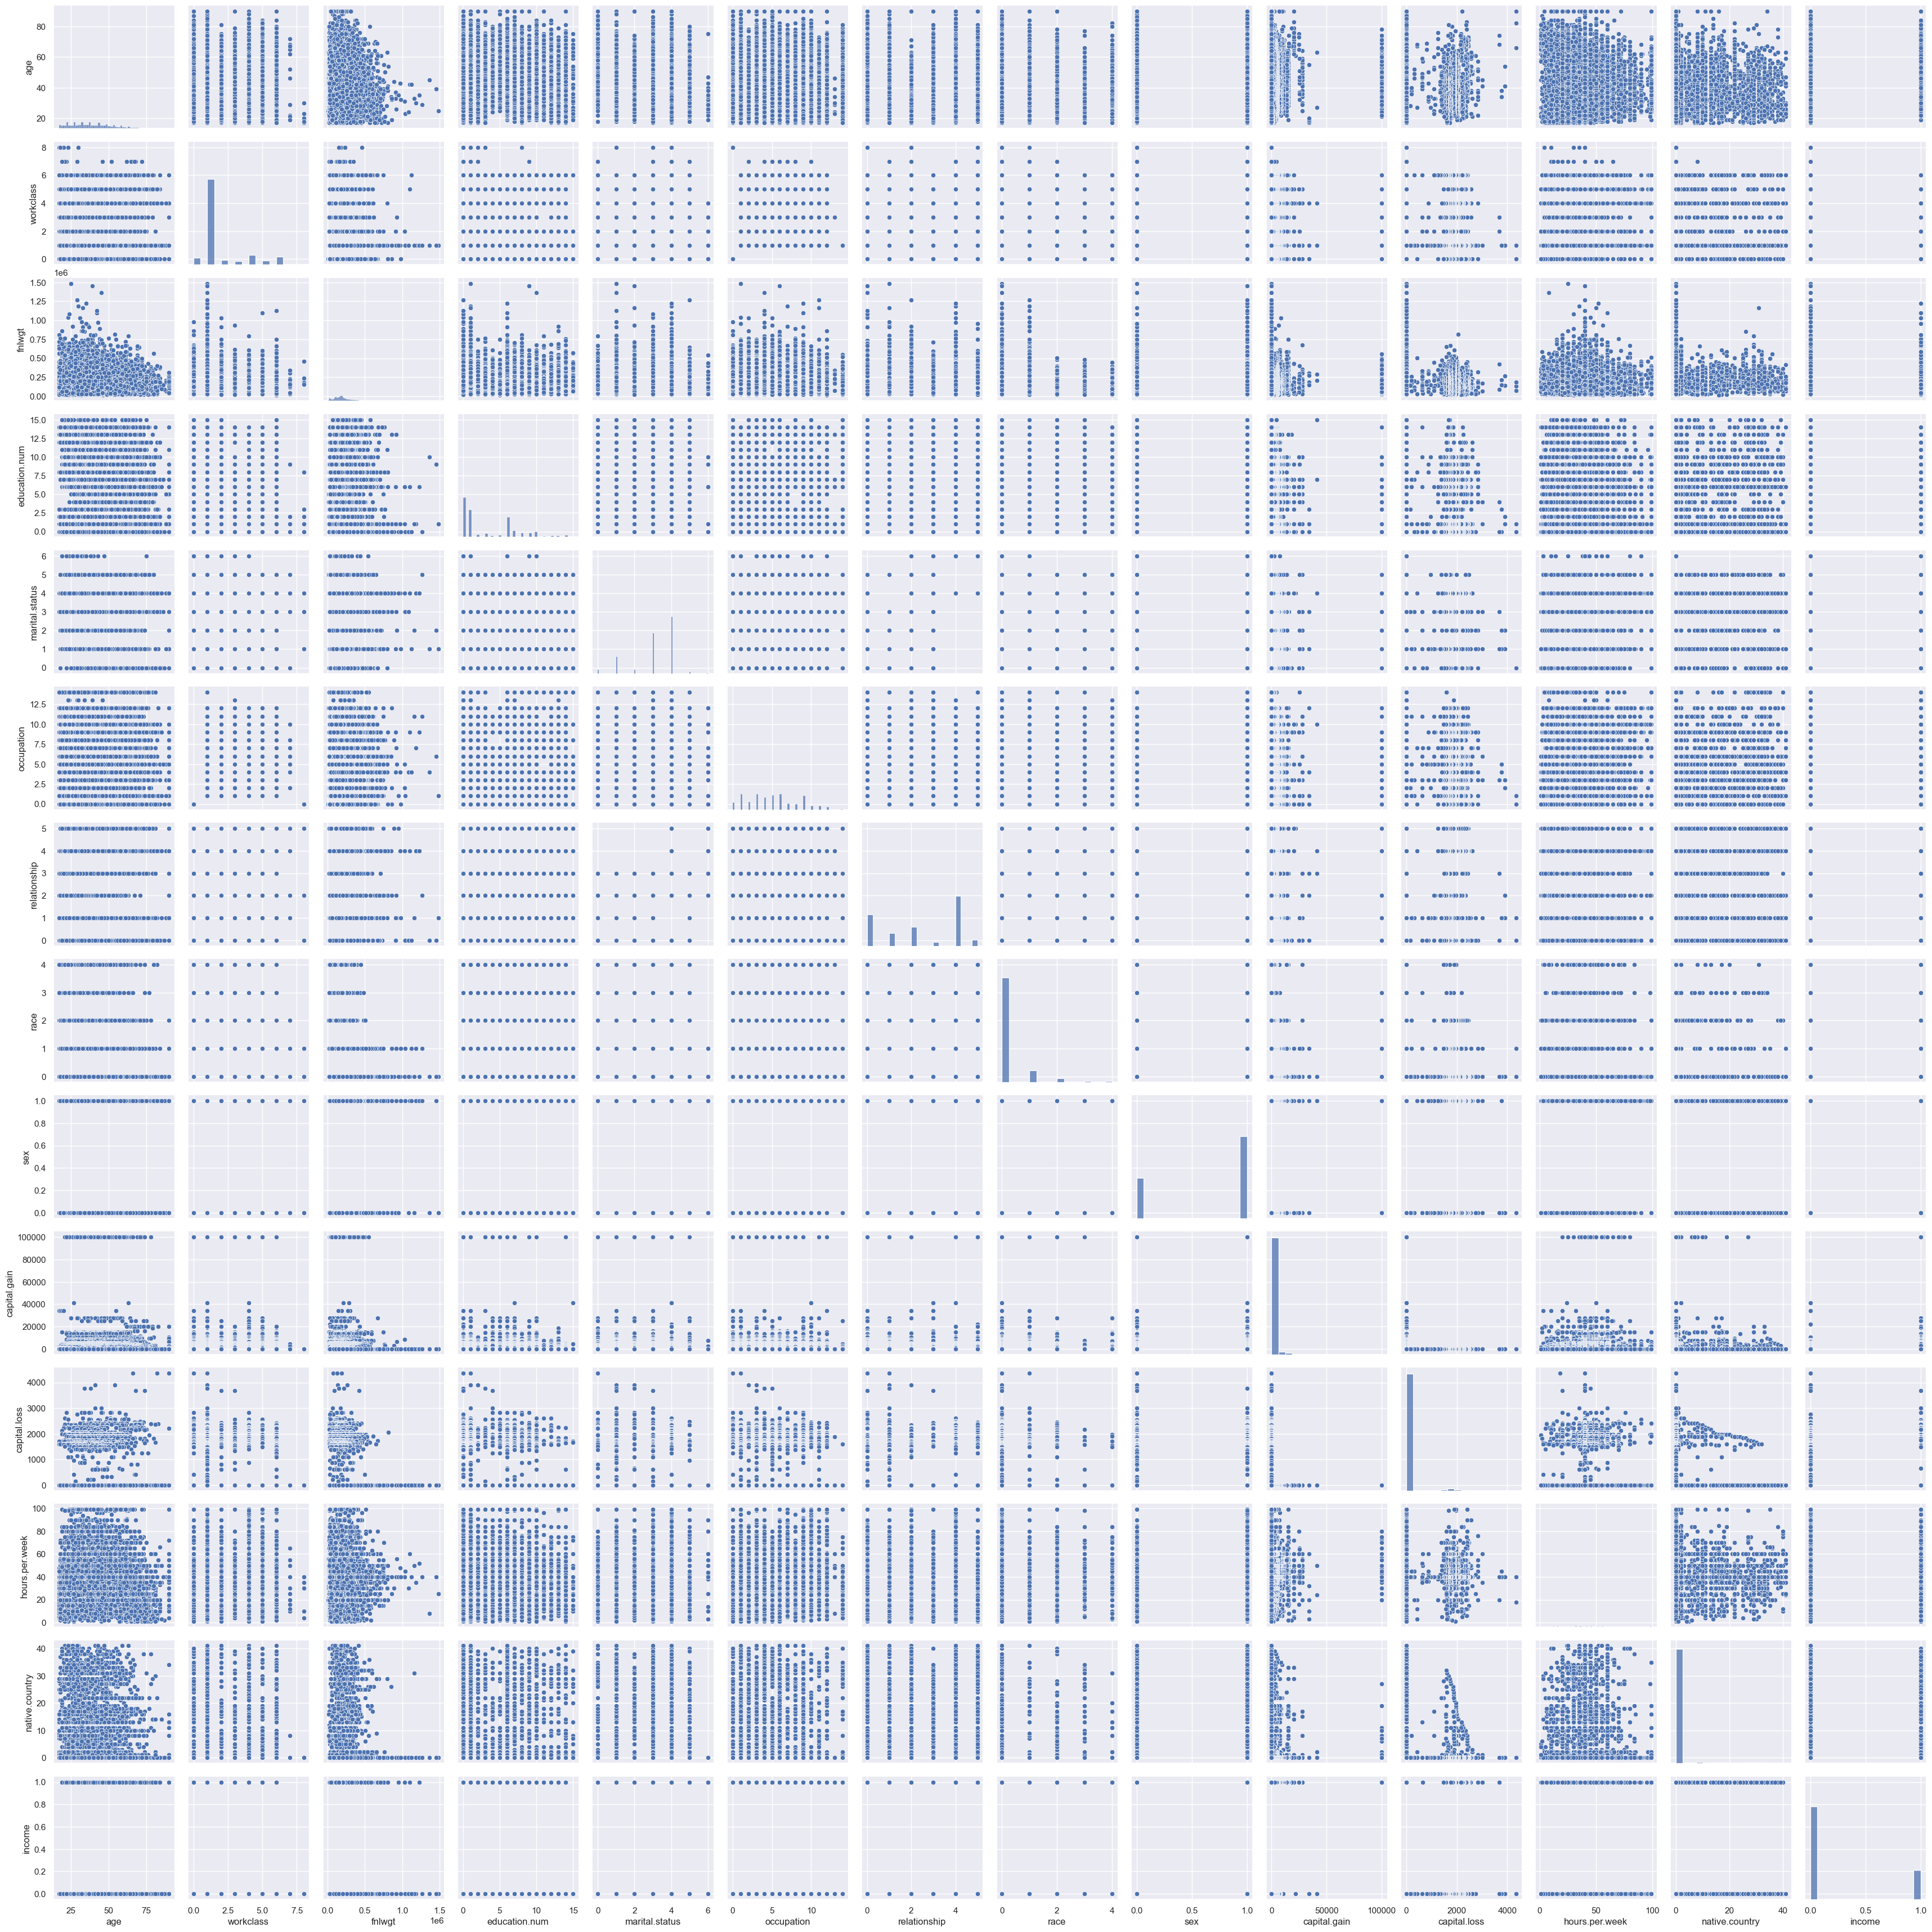

In [22]:
# pair-plot of all the data
sns.pairplot(data=fact_df)

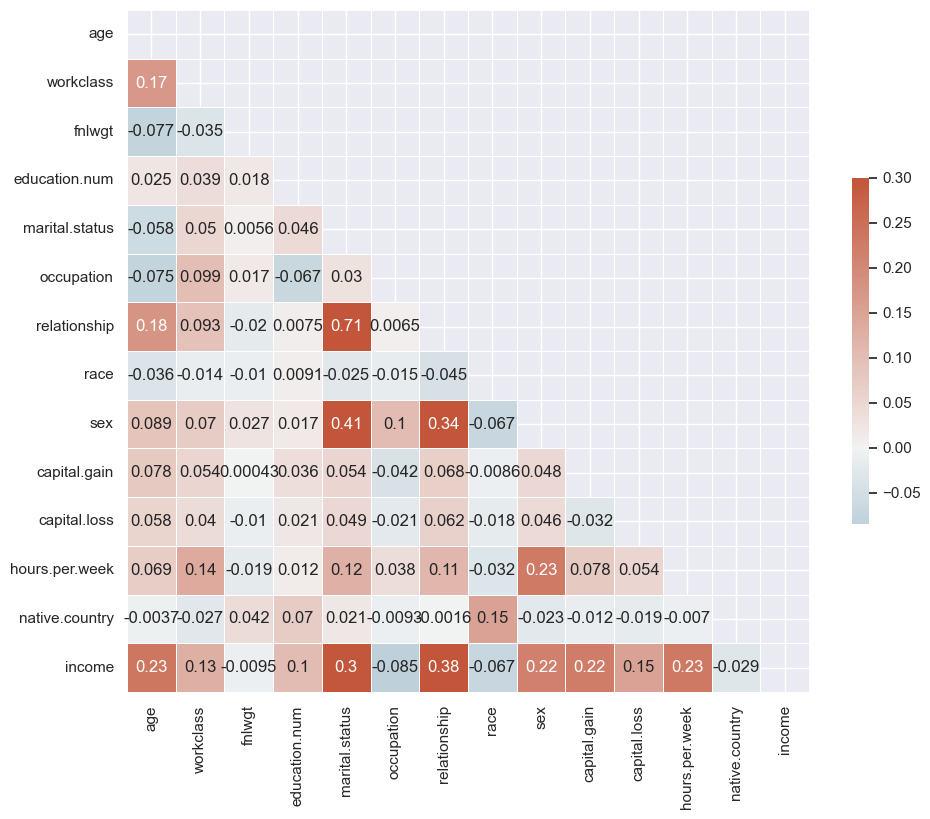

In [27]:
# compute the correlation matrix of all the data
corr = fact_df.corr()

# draw the correlation matrix
draw_corr_matrix(corr=corr)

### Conclusion

Do the analysis of the relation of all the variables

We can see that the variables that have the stronger correlation with the target **income** are:

Positive correlation:
- ages
- work class
- martial,status
- relationship
- hour.per.week

Negative correlation:
1. No variables have strong negative correlation with the target feature

# Step 5: Feature engineering

***Feature engineering*** is a process that involves the creation of new features (or variables) from existing ones to improve model performance. This may involve a variety of techniques, such as normalization, data transformation, and so on. The goal is to improve the accuracy of the model and/or reduce the complexity of the model, thus making it easier to interpret.

Although this could have been done in this step as it is part of the feature engineering, it is usually done before analyzing the variables, separating this process into a previous one and the one we are going to see next.

## Missing value analysis

No missing values as we could see before.

## Outlier analysis

An outlier is a data point that deviates significantly from the others. It is a value that is noticeably different from what would be expected given the general trend of the data. These outliers may be caused by errors in data collection, natural variations in the data, or they may be indicative of something significant, such as an anomaly or extraordinary event.

Descriptive analysis is a powerful tool for characterizing the data set: the mean, variance and quartiles provide powerful information about each variable. The describe() function of a DataFrame helps us to calculate in a very short time all these values.

In [28]:
# verify the distribution again
fact_df.describe()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.739136,1.897784e+05,3.450815,3.091858,4.982709,2.369000,0.222935,0.669205,1077.648844,87.303830,40.437456,1.278984,0.240810
std,13.640433,1.597393,1.055500e+05,3.848519,1.166620,3.197604,1.753353,0.633734,0.470506,7385.292085,402.960219,12.347429,5.275179,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.178270e+05,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.000000,1.783560e+05,1.000000,3.000000,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.370510e+05,6.000000,4.000000,7.000000,4.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


### Treating Outliers in Pandas DataFrames

There are several ways to treat outliers in a variable within a Pandas DataFrame. The best approach depends on the nature of your data, the extent of the outliers, and your specific analysis goals. Here's a breakdown of common methods:

**1. Removing Outliers:**

* **Method:** Filter out rows containing outliers based on a defined threshold.
* **When to use:**
    * When you're confident that the outliers are due to errors or anomalies.
    * When you have a large dataset and removing a few outliers won't significantly impact your analysis.
    * When you want to prevent outliers from skewing statistical measures.
* **Caution:**
    * Can lead to data loss.
    * May introduce bias if outliers are not random.


**2. Capping/Flooring Outliers:**

* **Method:** Replace outlier values with a predefined upper or lower limit.
* **When to use:**
    * When you want to preserve the data but reduce the impact of outliers.
    * When outliers are likely due to extreme but valid values.
* **Caution:**
    * Can distort the distribution of the data.
    * Requires careful selection of capping/flooring limits.


**3. Transforming Outliers:**

* **Method:** Apply mathematical transformations (e.g., log, square root, Box-Cox) to reduce the skewness caused by outliers.
* **When to use:**
    * When outliers are causing significant skewness in the data.
    * When your model assumes a normal distribution.
* **Caution:**
    * Can make data interpretation more complex.
    * Requires careful selection of transformation methods.


**4. Imputing Outliers:**

* **Method:** Replace outliers with estimated values (e.g., mean, median).
* **When to use:**
    * When you want to preserve the data and avoid data loss.
    * When the outliers are probably errors.
* **Caution:**
    * Can introduce bias if imputed values are not accurate.
    * Reduces variability in the data.

**5. Using Robust Scalers:**

* **Method:** Use scaling techniques that are less sensitive to outliers (e.g., `RobustScaler` from scikit-learn).
* **When to use:**
    * When you want to scale the data without removing or capping outliers.
    * When using models that are sensitive to feature scaling.
* **Caution:**
    * Doesn't remove or modify outliers; it only scales them.

**Choosing the Right Method:**

* Visualize your data: Use box plots, histograms, and scatter plots to identify outliers.
* Consider your model: Some models are more sensitive to outliers than others.
* Domain knowledge: Use your understanding of the data to determine the best approach.
* Experiment: Try different methods and evaluate their impact on your analysis.

**Explain what was done**

## Inference of new features

Another typical use of this engineering is to obtain new features by "merging" two or more existing ones.

**Explain what was done**

## Divide the set into train and test,

In [29]:
from src.utils import split_my_data

# set independent and dependent variables
X: pd.DataFrame = fact_df.drop(target, axis=1)
y: pd.Series = fact_df[target]

# divide the dataset into training and test samples
X_train, X_test, y_train, y_test = split_my_data(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature scaling

In this case we are not going to scale the data because the model does not need it.

# Step 6: Feature selection

Not necessary because the model to use is XGBoost

# Step 7: Save the values

In [32]:
X_TRAIN_PATH: str = "data/processed/x_train.csv"
X_TEST_PATH: str = "data/processed/x_test.csv"

Y_TRAIN_PATH: str = "data/processed/y_train.csv"
Y_TEST_PATH: str = "data/processed/y_test.csv"

# save the processed data to their corresponding files
X_train.to_csv(path_or_buf=X_TRAIN_PATH, sep=',', index=False, )
X_test.to_csv(path_or_buf=X_TEST_PATH, sep=',', index=False, )

y_train.to_csv(path_or_buf=Y_TRAIN_PATH, sep=',', index=False, )
y_test.to_csv(path_or_buf=Y_TEST_PATH, sep=',', index=False, )